<a href="https://www.analytiksinc.com">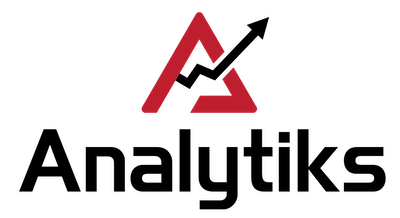</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# Cervical Cancer Risk Factors for Biopsy

<b>Dataset:</b> <i>kag_risk_factors_cervical_cancer_cleaned.csv</i> <br>

<b><a href="https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29">Description</b></a><br>
    
<b>Objectives:</b>
- Load and Explore the Dataset
- Split into Training and Test Set (see guidelines below)
- Build the following models using the Training Set (using default parameters):
    - KNN
    - Logistic Regression
    - Decision Tree
- Print the Accuracy Score of a Train/Test Split (see parameters below)  
- Build the following models using the WHOLE dataset
- Print the Accuracy Score on a 5-fold cross validation of the whole dateset given  
- <i>Bonus:
    - Experiment with Decision Tree parameters to determine if you can increase the accuracy
    - Report the highest accuracy score on  a 5-fold cross val</i> 

<b>Guidelines:</b><br>
- Target Column: Biopsy
- Train Test Split Parameters:
    - test_size = 0.25
    - random_state = 12
- For models that have a random_state parameter:
    - random_state=12

## Import Libraries

## Standard Libraries

In [1]:
#Data analysis libraries 
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

#ignore warnings (Optional)
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

In [2]:
#Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score

#Accuracy Score Metric
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Required Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression ##MMS
from sklearn.naive_bayes import GaussianNB  #SS


#Others
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random

## Load and Explore the Dataset

In [3]:
#Provide the path of the dataset
df = pd.read_csv("kag_risk_factors_cervical_cancer_cleaned.csv")

### Inspect  Data

In [4]:
#Check the dataset
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44.0,3.0,26.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Check the min, max, and mean values
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.0,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,25.883212,2.155718,17.411192,2.014599,0.048662,0.351097,0.095423,0.666667,1.635693,0.029197,...,0.0,0.026764,0.014599,0.007299,0.014599,0.017032,0.060827,0.116788,0.043796,0.133820
std,7.362462,1.075258,2.745954,1.117393,0.215422,2.434709,0.852453,0.471979,2.848869,0.168564,...,0.0,0.161590,0.120085,0.085227,0.120085,0.129547,0.239304,0.321559,0.204889,0.340874
min,14.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.000000,10.000000,29.000000,8.000000,1.000000,34.000000,15.000000,1.000000,20.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Check for all columns data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 34 columns):
Age                                   411 non-null float64
Number of sexual partners             411 non-null float64
First sexual intercourse              411 non-null float64
Num of pregnancies                    411 non-null float64
Smokes                                411 non-null float64
Smokes (years)                        411 non-null float64
Smokes (packs/year)                   411 non-null float64
Hormonal Contraceptives               411 non-null float64
Hormonal Contraceptives (years)       411 non-null float64
IUD                                   411 non-null float64
IUD (years)                           411 non-null float64
STDs                                  411 non-null float64
STDs (number)                         411 non-null float64
STDs:condylomatosis                   411 non-null float64
STDs:cervical condylomatosis          411 non-null float64
STDs:vagin

In [7]:
#Identify and check the value counts of the target variable
#check for bias or heavily skewed class.
df['Biopsy'].value_counts()

0.0    356
1.0     55
Name: Biopsy, dtype: int64

In [8]:
#Get the correlation of the attributes
corr = df.corr()
corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.144333,0.424871,0.515777,0.014357,0.175531,0.111626,7.720814e-02,0.334808,2.385903e-01,...,NaN,0.045686,6.814164e-02,0.005249,6.814164e-02,-0.000467,0.060800,0.192246,0.105261,0.147161
Number of sexual partners,0.144333,1.000000,-0.149778,0.075244,0.219918,0.167292,0.157441,3.524374e-02,0.065645,9.596504e-02,...,NaN,-0.010007,-3.653746e-02,-0.012433,-3.653746e-02,-0.019086,0.019972,0.130681,0.168246,0.129332
First sexual intercourse,0.424871,-0.149778,1.000000,0.014732,-0.132865,-0.101249,-0.126918,1.191880e-02,0.032303,-1.019258e-02,...,NaN,0.024609,2.613108e-02,-0.002434,2.613108e-02,0.021403,-0.056714,-0.018610,0.006930,-0.048507
Num of pregnancies,0.515777,0.075244,0.014732,1.000000,0.047704,0.178522,0.079596,1.479917e-01,0.211857,2.178695e-01,...,NaN,0.011339,8.929239e-02,-0.052344,8.929239e-02,0.015128,0.087885,0.164946,0.050468,0.161349
Smokes,0.014357,0.219918,-0.132865,0.047704,1.000000,0.638385,0.495549,-3.198465e-02,0.092862,2.794574e-02,...,NaN,0.242762,-2.752800e-02,-0.019394,-2.752800e-02,-0.029770,0.179004,0.234647,0.062116,0.243252
Smokes (years),0.175531,0.167292,-0.101249,0.178522,0.638385,1.000000,0.630902,-3.169655e-02,0.094226,1.770228e-01,...,NaN,0.219492,-1.757346e-02,-0.012381,-1.757346e-02,-0.019005,0.310709,0.306596,0.110891,0.290817
Smokes (packs/year),0.111626,0.157441,-0.126918,0.079596,0.495549,0.630902,1.000000,2.657259e-02,0.251682,3.827478e-02,...,NaN,0.074607,-1.364148e-02,-0.009610,-1.364148e-02,-0.014753,0.255438,0.252102,0.205032,0.257391
Hormonal Contraceptives,0.077208,0.035244,0.011919,0.147992,-0.031985,-0.031697,0.026573,1.000000e+00,0.406484,2.345298e-17,...,NaN,-0.042640,3.795984e-17,-0.060634,3.795984e-17,-0.066484,0.007198,-0.032141,0.025222,-0.010107
Hormonal Contraceptives (years),0.334808,0.065645,0.032303,0.211857,0.092862,0.094226,0.251682,4.064840e-01,1.000000,1.622830e-01,...,NaN,-0.070586,1.593126e-01,-0.019157,1.593126e-01,-0.048177,0.161628,0.257078,0.156225,0.232390
IUD,0.238590,0.095965,-0.010193,0.217869,0.027946,0.177023,0.038275,2.345298e-17,0.162283,1.000000e+00,...,NaN,0.060786,2.198776e-01,-0.014871,2.198776e-01,0.200558,0.258188,0.341917,0.104127,0.313868


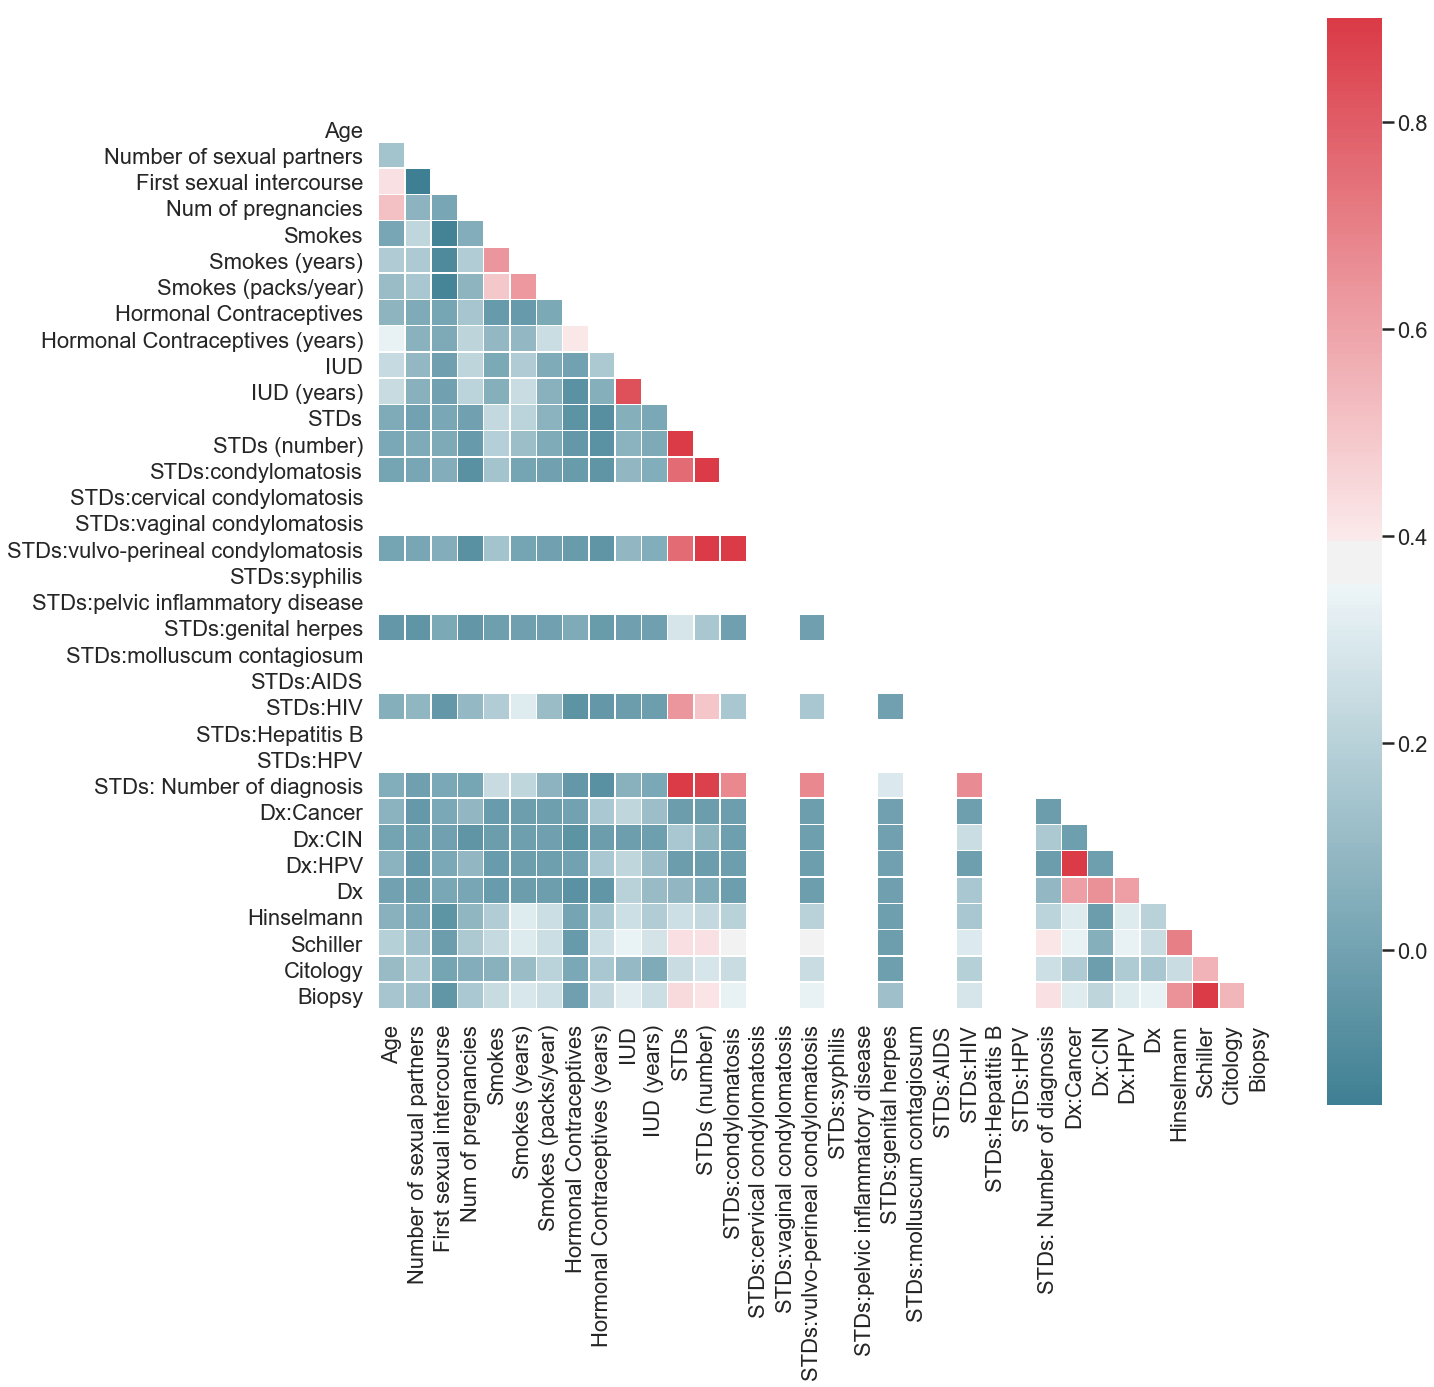

In [9]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

## Prepare Train and Test data

### Separate y (target) from x (predictor) columns
*Note: for the predictor columns, review the features to determine if any of the features should not be included in building the model*

In [10]:
#Split the features and the target column.
predictors = df.drop(["Biopsy"], axis=1)
target = df["Biopsy"]

### Split into train and test partitions using the train_test_split function
test_size should be 25% and random_state = 12

In [11]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=12)

## Build and Validate Models

#### Build the following models using the Training Set (using default parameters):
1. KNN 
2. Logistic Regression
3. Decision Tree Classifier

*Note: Print the Accuracy Score of a Train/Test Split (see parameters below)
*Note: For models that have a random_state parameter, set random_state = 12*

- Print the Accuracy Score of a Train/Test Split (see parameters below)
- Build the following models using the WHOLE dataset
- Print the Accuracy Score on a 5-fold cross validation of the whole dateset given  
- <i>Bonus:
    - Experiment with Decision Tree parameters to determine if you can increase the accuracy
    - Report the highest accuracy score on  a 5-fold cross val</i> 

### 1. KNN (k-Nearest Neighbors)

In [12]:
#Build Model using default parameters

knn = KNeighborsClassifier()

#Fit the model to the training set
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
#Predict on the Test Set
y_pred = knn.predict(x_test)

In [14]:
#Print Accuracy Score on Test Set
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

87.38%


In [15]:
#Print Accuracy Score on a 5-fold cross-validation
score = np.mean(cross_val_score(knn, predictors, target, cv=5))
print("{:.2%}".format(score))

88.80%


In [16]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        89
         1.0       1.00      0.07      0.13        14

   micro avg       0.87      0.87      0.87       103
   macro avg       0.94      0.54      0.53       103
weighted avg       0.89      0.87      0.82       103




In [17]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels.sort(), columns=labels.sort())
cm_df

,0,1
0,89,0
1,13,1


Text(0.5,23.5,'Predicted label')

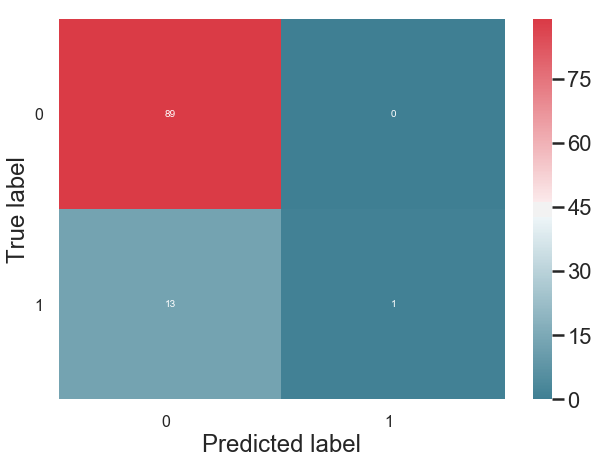

In [18]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2. Logistic Regression

#### Scaling the Dataset

In [19]:
#Instantiate the MinMax Scaler
minmax = MinMaxScaler()

#Fit the scaler to the training set
#building the model.
# we use train set only so that when the model is applied to test, it hasn't seen the data. 
#we do not want to inform the test set. the test set should not be seen by the machine..
minmax.fit(x_train)


#Transform the training set
x_train_scaled = minmax.transform(x_train)

#Transform the test set
x_test_scaled = minmax.transform(x_test)

In [20]:
#View the type of the scaled data
type(x_train_scaled)

numpy.ndarray

In [21]:
#Change to Pandas dataframe for easier viewing and manipulation of the data
#sdf = scaled dataframe
x_train_sdf = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_test_sdf = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)

In [22]:
#Check the min, max, and mean values to determine if features are on the same scale
x_train_sdf.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,...,308.0,308.0,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.326869,0.132035,0.362554,0.250406,0.048701,0.012704,0.007382,0.665584,0.083529,0.032468,...,0.0,0.0,0.022727,0.016234,0.006494,0.016234,0.019481,0.071429,0.123377,0.048701
std,0.200469,0.122486,0.149623,0.138519,0.215593,0.081995,0.064459,0.472554,0.148847,0.177527,...,0.0,0.0,0.149275,0.126579,0.080451,0.126579,0.138431,0.257958,0.329404,0.215593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.162162,0.000000,0.277778,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.297297,0.111111,0.333333,0.250000,0.000000,0.000000,0.000000,1.000000,0.025000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.459459,0.222222,0.444444,0.375000,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#View the dataset
x_train_sdf.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
343,0.567568,0.222222,0.277778,0.375,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.243243,0.000000,0.222222,0.375,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.324324,0.111111,0.444444,0.125,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.432432,0.111111,0.611111,0.250,0.0,0.0,0.0,1.0,0.004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.135135,0.222222,0.277778,0.125,0.0,0.0,0.0,1.0,0.025,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train the Model

In [24]:
#Build Model using default parameters
logreg = LogisticRegression(C=1e9, class_weight="balanced", solver='liblinear', random_state=12)
logreg.fit(x_train_sdf, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=12,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
#Make Predictions
y_pred = logreg.predict(x_test_sdf)

In [26]:
#Print Accuracy Score on Test Set
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

96.12%


In [27]:
#Print Accuracy Score on a 5-fold cross-validation
score = np.mean(cross_val_score(logreg, predictors, target, cv=5))
print("{:.2%}".format(score))

97.57%


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        89
         1.0       1.00      0.71      0.83        14

   micro avg       0.96      0.96      0.96       103
   macro avg       0.98      0.86      0.91       103
weighted avg       0.96      0.96      0.96       103



In [29]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=12,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        89
         1.0       1.00      0.71      0.83        14

   micro avg       0.96      0.96      0.96       103
   macro avg       0.98      0.86      0.91       103
weighted avg       0.96      0.96      0.96       103




In [30]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels, columns=labels)
cm_df

,1.0,0.0
1.0,89,0
0.0,4,10


Text(0.5,23.5,'Predicted label')

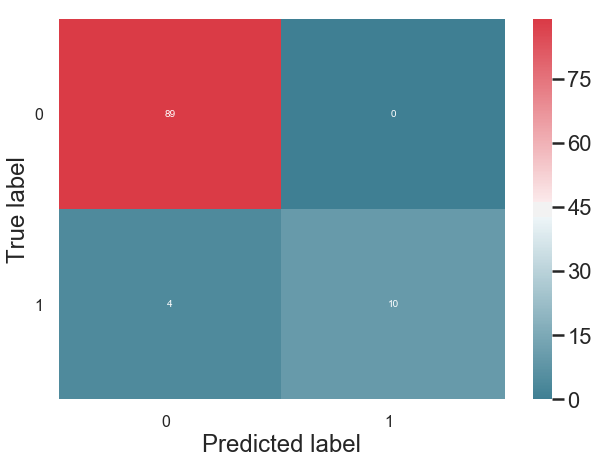

In [31]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 3. Decision Tree

In [32]:
#Build Model using default parameters

#Instantiate the Algorithm
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=12)

#Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [33]:
#Make Predictions
y_pred = clf.predict(x_test)

In [34]:
#Print Accuracy Score on Test Set
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

96.12%


In [35]:
#Print Accuracy Score on a 5-fold cross-validation
score = np.mean(cross_val_score(clf, predictors, target, cv=5))
print("{:.2%}".format(score))

98.30%


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        89
         1.0       1.00      0.71      0.83        14

   micro avg       0.96      0.96      0.96       103
   macro avg       0.98      0.86      0.91       103
weighted avg       0.96      0.96      0.96       103



In [37]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best'):
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        89
         1.0       1.00      0.71      0.83        14

   micro avg       0.96      0.96      0.96       103
   macro avg       0.98      0.86      0.91       103
weighted avg       0.96      0.96      0.96       103




In [38]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels, columns=labels)
cm_df

,1.0,0.0
1.0,89,0
0.0,4,10


Text(0.5,23.5,'Predicted label')

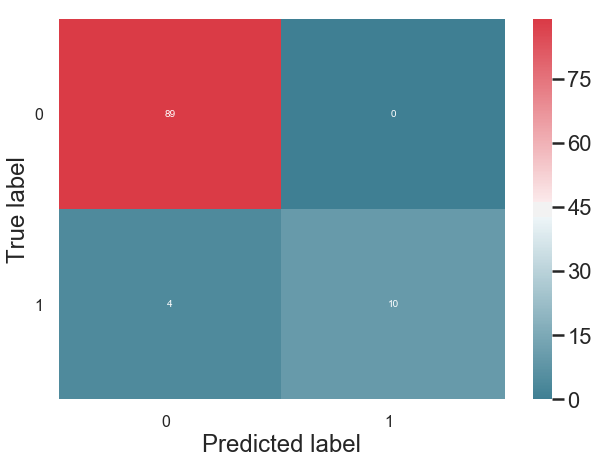

In [39]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Modified Decision Tree - Different Parameters

In [40]:
fields = ['Min Samples Split', 'Min Samples Leaf','Max Depth', 'Score']

summary = pd.DataFrame(columns=fields)
summary

,Min Samples Split,Min Samples Leaf,Max Depth,Score


In [41]:
for i in range(10):
    minSamplesSplit = random.randint(4,50)
    minSamplesLeaf = random.randint(5,50)
    maxDepth = random.randint(10,50)
    #Instantiate the Algorithm
    clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=minSamplesSplit, min_samples_leaf=minSamplesLeaf,
            max_depth=maxDepth, random_state=12)

    #Train the model
    clf.fit(x_train,y_train)
    
    score = np.mean(cross_val_score(clf, predictors, target, cv=5))
    summary.loc[i] = [minSamplesSplit,minSamplesLeaf,maxDepth,"{:.2%}".format(score)]
    #print("{:.2%}".format(score))

In [42]:
summary

,Min Samples Split,Min Samples Leaf,Max Depth,Score
0,31,26,21,98.30%
1,22,36,10,98.30%
2,50,14,41,98.30%
3,28,37,38,98.30%
4,6,26,12,98.30%
5,12,36,41,98.30%
6,28,42,45,86.62%
7,12,28,45,98.30%
8,37,21,19,98.30%
9,49,29,33,98.30%


In [43]:
score = 0
topscore = 0.9830
count = 0
while(topscore>score):
    minSamplesSplit = random.randint(4,25)
    minSamplesLeaf = random.randint(5,25)
    maxDepth = random.randint(10,25)
    #Instantiate the Algorithm
    clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=minSamplesSplit, min_samples_leaf=minSamplesLeaf,
            max_depth=maxDepth, random_state=12)

    #Train the model
    clf.fit(x_train,y_train)
    
    score = np.mean(cross_val_score(clf, predictors, target, cv=5))
    summary.loc[count] = [minSamplesSplit,minSamplesLeaf,maxDepth,"{:.2%}".format(score)]
    #print("{:.2%}".format(score))
    count=count+1
    if count == 5000:
        print count
        break

5000


In [44]:
summary

,Min Samples Split,Min Samples Leaf,Max Depth,Score
0,8,13,11,98.30%
1,4,6,12,98.30%
2,10,17,14,98.30%
3,11,12,19,98.30%
4,8,5,13,98.30%
5,18,14,10,98.30%
6,22,22,24,98.30%
7,13,13,24,98.30%
8,16,23,16,98.30%
9,16,20,14,98.30%


### Modified Decision Tree - Filtered Predictors

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 34 columns):
Age                                   411 non-null float64
Number of sexual partners             411 non-null float64
First sexual intercourse              411 non-null float64
Num of pregnancies                    411 non-null float64
Smokes                                411 non-null float64
Smokes (years)                        411 non-null float64
Smokes (packs/year)                   411 non-null float64
Hormonal Contraceptives               411 non-null float64
Hormonal Contraceptives (years)       411 non-null float64
IUD                                   411 non-null float64
IUD (years)                           411 non-null float64
STDs                                  411 non-null float64
STDs (number)                         411 non-null float64
STDs:condylomatosis                   411 non-null float64
STDs:cervical condylomatosis          411 non-null float64
STDs:vagin

In [46]:
predictors_filtered = predictors[["Age", "Smokes", "STDs", "STDs (number)", "Dx:Cancer", "Dx:CIN","Dx:HPV","Dx","Hinselmann","Schiller","Citology"]]
predictors_filtered.head()

,Age,Smokes,STDs,STDs (number),Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(predictors_filtered, target, test_size=0.25, random_state=12)

In [48]:
#Build Model using default parameters

#Instantiate the Algorithm
clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=12)

#Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [49]:
score = np.mean(cross_val_score(clf, predictors_filtered, target, cv=5))
print("{:.2%}".format(score))

98.30%
